<a href="https://colab.research.google.com/github/Ma7moudYasser/POS-tagging-Task/blob/main/pos_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing graphviz

In [1]:
!pip install graphviz

# Useful Imports

In [2]:
from transformers import pipeline
import graphviz
import networkx as nx
import matplotlib.pyplot as plt

#Importing bert base camelbert

In [3]:
pos_model = pipeline('token-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-ca-pos-egy')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.85k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-ca-pos-egy were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

# Testing the model and implementing graphviz graph (network graph)

In [10]:

text = 'ذهبت الي المدرسة مع والدتي'

# Perform POS tagging
pos_tags = pos_model(text)

# Create a directed graph
graph = graphviz.Digraph(format='png')

# Add nodes and edges based on results
for i in range(len(pos_tags)):
    word = pos_tags[i]['word']
    pos_tag = pos_tags[i]['entity']


    graph.node(word, label=f'{word}\n({pos_tag})')

    # Add edges between consecutive words
    if i > 0:
        prev_word = pos_tags[i - 1]['word']
        graph.edge(prev_word, word)

# Saving graph image
graph.render('pos_network_graph', format='png', cleanup=True)

# Displaying the graph
graph.view('pos_network_graph')

'pos_network_graph.png'

# Implementing network graph using matplotlib

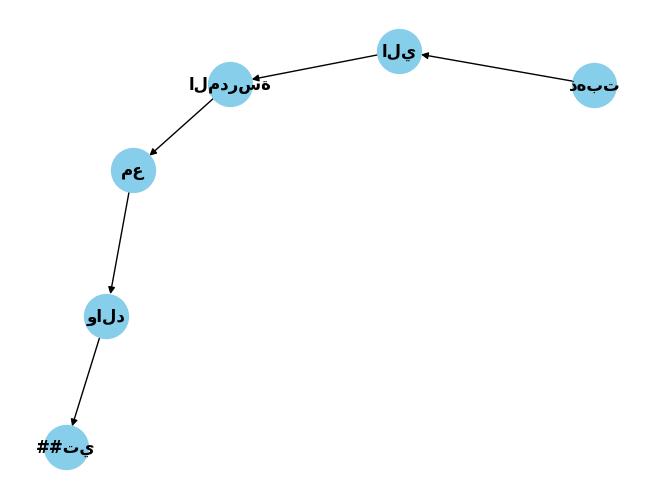

In [8]:
# Sample text
text = 'ذهبت الي المدرسة مع والدتي'


pos_tags = pos_model(text)

# Create a graph
G = nx.DiGraph()

# Add nodes between edges of two consecutive words
for i in range(len(pos_tags)):
    word = pos_tags[i]['word']
    pos_tag = pos_tags[i]['entity']

    # Add nodes (words) and POS tags as node attributes
    G.add_node(word, pos=pos_tag)

    # Add edges between consecutive words
    if i > 0:
        prev_word = pos_tags[i - 1]['word']
        G.add_edge(prev_word, word)

# Draw the network graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Showing the graph
plt.show()

# Sample Arabic Article and reading every sentence inside it and move it towards the pos tagging

In [11]:
article = """

تتميز اللغة العربية بأصالة ماضيها؛ فهي من أقدم اللغات في العالم، فهي لغة الرسول محمد صلى الله عليه وسلم،
 كما أنها اللغة التي نزل بها كلام الله تعالى في القرآن الكريم


"""

In [15]:
#Splitting every sentence inside the article
for sentence in article.split('.'):
    sentence = sentence.strip()
    if sentence:
        pos_tags = pos_model(sentence)
        print(pos_tags)

[{'entity': 'verb', 'score': 0.99958545, 'index': 1, 'word': 'تتميز', 'start': 0, 'end': 5}, {'entity': 'noun', 'score': 0.9999502, 'index': 2, 'word': 'اللغة', 'start': 6, 'end': 11}, {'entity': 'adj', 'score': 0.9515058, 'index': 3, 'word': 'العربية', 'start': 12, 'end': 19}, {'entity': 'noun', 'score': 0.9999393, 'index': 4, 'word': 'بأص', 'start': 20, 'end': 23}, {'entity': 'noun', 'score': 0.9999341, 'index': 5, 'word': '##الة', 'start': 23, 'end': 26}, {'entity': 'adj', 'score': 0.99942553, 'index': 6, 'word': 'ماضي', 'start': 27, 'end': 31}, {'entity': 'adj', 'score': 0.9993974, 'index': 7, 'word': '##ها', 'start': 31, 'end': 33}, {'entity': 'punc', 'score': 0.999313, 'index': 8, 'word': '؛', 'start': 33, 'end': 34}, {'entity': 'pron', 'score': 0.99084187, 'index': 9, 'word': 'فهي', 'start': 35, 'end': 38}, {'entity': 'prep', 'score': 0.999371, 'index': 10, 'word': 'من', 'start': 39, 'end': 41}, {'entity': 'adj_comp', 'score': 0.9989095, 'index': 11, 'word': 'أقدم', 'start': 42,

[{'entity': 'verb', 'score': 0.99958545, 'index': 1, 'word': 'تتميز', 'start': 0, 'end': 5}, {'entity': 'noun', 'score': 0.9999502, 'index': 2, 'word': 'اللغة', 'start': 6, 'end': 11}, {'entity': 'adj', 'score': 0.9515058, 'index': 3, 'word': 'العربية', 'start': 12, 'end': 19}, {'entity': 'noun', 'score': 0.9999393, 'index': 4, 'word': 'بأص', 'start': 20, 'end': 23}, {'entity': 'noun', 'score': 0.9999341, 'index': 5, 'word': '##الة', 'start': 23, 'end': 26}, {'entity': 'adj', 'score': 0.99942553, 'index': 6, 'word': 'ماضي', 'start': 27, 'end': 31}, {'entity': 'adj', 'score': 0.9993974, 'index': 7, 'word': '##ها', 'start': 31, 'end': 33}, {'entity': 'punc', 'score': 0.999313, 'index': 8, 'word': '؛', 'start': 33, 'end': 34}, {'entity': 'pron', 'score': 0.99084187, 'index': 9, 'word': 'فهي', 'start': 35, 'end': 38}, {'entity': 'prep', 'score': 0.999371, 'index': 10, 'word': 'من', 'start': 39, 'end': 41}, {'entity': 'adj_comp', 'score': 0.9989095, 'index': 11, 'word': 'أقدم', 'start': 42,

{}

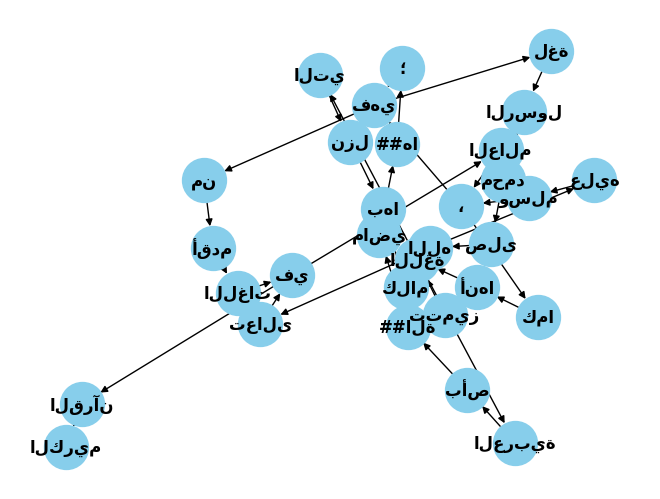

In [13]:


pos_tags = pos_model(article)

# Create a graph
G = nx.DiGraph()

# Add nodes between edges of two consecutive words
for i in range(len(pos_tags)):
    word = pos_tags[i]['word']
    pos_tag = pos_tags[i]['entity']

    # Add nodes (words) and POS tags as node attributes
    G.add_node(word, pos=pos_tag)

    # Add edges between consecutive words
    if i > 0:
        prev_word = pos_tags[i - 1]['word']
        G.add_edge(prev_word, word)

# Draw the network graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)